Enable automatic reloading of imported modules.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
%aimport helpers, loaders, plotters 
# Reload my custom modules every time before python code is executed (possible performance penalty)

In [40]:
from pprint import pprint
from math import ceil
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import load_best_result, save_search_result, scikit_cv_result_to_df
from loaders import load_mnist
from plotters import plot_means_w_stds, gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

### Load Data

In [5]:
df = load_mnist(preprocess=True)

1    6958
0    6824
Name: target, dtype: int64


/home/jovyan/loaders.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_df['target'] = le.fit_transform(filtered_df['target'])


### Split data into training and testing

In [6]:
X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Scale Data

In [7]:
# Use min max scaling because input dataset is sparse, i.e. mostly zeros
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Support Vector Machine Model Complexity
Sources:
1. https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
2. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

#### Hyperparameters for SVMs

**Kernel:** The kernel function used to perform the "kernel trick"

**C:** Penalty parameter C of the error term.

**gamma:** Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

In [108]:
from sklearn.svm import SVC

base_clf = SVC()

base_clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

In [7]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [8]:
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=0.9469539991711562, total=  32.5s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=0.9560530679933665, total=  33.1s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=0.9531314807133969, total=  33.0s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=0.9601824968892576, total=  33.3s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV]  C=0.001, gamma=0.001, kernel=pol

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.5min


[CV]  C=0.001, gamma=0.001, kernel=poly, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=poly, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.5047658516369664, total= 1.6min
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.001, gamma=0.01, kernel=linear ..............................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.1min


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.5049751243781094, total= 1.6min
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV]  C=0.001, gamma=0.01, kernel=linear, score=0.9469539991711562, total=  32.3s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV]  C=0.001, gamma=0.01, kernel=linear, score=0.9560530679933665, total=  33.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV]  C=0.001, gamma=0.01, kernel=linear, score=0.9531314807133969, total=  32.7s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV]  C=0.001, gamma=0.01, kernel=linear, score=0.9601824968892576, total=  32.9s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV]  C=0.001, gamma=0.01, kernel=poly, score=0.5047658516369664, total= 1.5min
[CV] C=

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.5min


[CV]  C=0.001, gamma=0.01, kernel=poly, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=poly, score=0.5049751243781094, total= 1.5min
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=poly, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.5047658516369664, total= 1.6min
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.5049751243781094, total= 1.6min
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.001, gamma=0.

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.2min


[CV]  C=0.001, gamma=0.1, kernel=linear, score=0.9469539991711562, total=  32.6s
[CV] C=0.001, gamma=0.1, kernel=poly .................................
[CV]  C=0.001, gamma=0.1, kernel=linear, score=0.9560530679933665, total=  33.1s
[CV] C=0.001, gamma=0.1, kernel=poly .................................
[CV]  C=0.001, gamma=0.1, kernel=linear, score=0.9531314807133969, total=  32.7s
[CV] C=0.001, gamma=0.1, kernel=poly .................................
[CV]  C=0.001, gamma=0.1, kernel=linear, score=0.9601824968892576, total=  32.9s
[CV] C=0.001, gamma=0.1, kernel=poly .................................
[CV]  C=0.001, gamma=0.1, kernel=poly, score=0.9801077496891836, total=  18.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=poly, score=0.9871475953565506, total=  18.7s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=poly, score=0.9842389050186644, total=  17.9s
[CV] C=0.001,

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.2min


[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.5049751243781094, total= 1.6min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.9469539991711562, total=  32.0s
[CV] C=0.001, gamma=1, kernel=poly ...................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.9560530679933665, total=  32.6s
[CV] C=0.001, gamma=1, kernel=poly ...................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.9531314807133969, total=  33.5s
[CV] C=0.001, gamma=1, kernel=poly ...................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.9601824968892576, total=  32.8s
[CV] C=0.001, gamma=1, ker

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.3min


[CV]  C=0.001, gamma=1, kernel=poly, score=0.9892160929075072, total=   9.1s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=poly, score=0.990460389879718, total=   9.4s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.5047658516369664, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.5049751243781094, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV]  C=0.01, gamma=0.001, kernel=linear, score=0.9598010774968918, total=  15.5s
[CV] C=0.01, gamma=0.001, kernel=poly

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 22.7min


[CV]  C=0.01, gamma=0.001, kernel=poly, score=0.5049751243781094, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=poly, score=0.504769805060141, total= 1.5min
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=poly, score=0.504769805060141, total= 1.6min
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5192706174886034, total= 1.6min
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5323383084577115, total= 1.6min
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5184570717544588, total= 1.5min
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5118208212360017, total= 1.6min
[CV] C=0.01, gamma=0

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 26.0min


[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9191877331123083, total= 1.4min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9071310116086235, total= 1.3min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9124844462878474, total= 1.3min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=poly, score=0.9191206968063045, total= 1.4min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9287194363862412, total= 1.3min
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9332504145936982, total= 1.3min
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9253421816673579, total= 1.3min
[CV] C=0.01, gamma=0.1, 

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 30.9min


[CV]  C=0.01, gamma=0.1, kernel=poly, score=0.9883865615927001, total=  10.2s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=poly, score=0.9912899211945251, total=  11.5s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5049751243781094, total= 1.5min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5047658516369664, total= 1.6min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.9598010774968918, total=  15.7s
[CV] C=0.01, gamma=1, kernel=poly 

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 34.2min


[CV]  C=0.01, gamma=1, kernel=linear, score=0.9684778100373289, total=  16.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=poly, score=0.990460389879718, total=  10.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5047658516369664, total= 1.5min
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5049751243781094, total= 1.6min
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.504769805060141, total= 1.6min
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.967260671363448, total=  10.4s
[CV] C=0.1, gamma=0.001, kernel=poly ......

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 41.1min


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9369817578772802, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.92907507258399, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.967260671363448, total=  10.3s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9440066362505185, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.9705638474295191, total=  10.7s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.9643301534632932, total=  10.7s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.9705516383243468, total=  11.2s
[CV] C=0.1, gamma=0.01,

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 43.7min


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9742845292409789, total=  31.6s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9705638474295191, total=  11.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9643301534632932, total=  11.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9705516383243468, total=  11.4s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.984251968503937, total=   9.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.9867330016583747, total=   9.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.9892160929075072, total=   9.1s
[CV] C=0.1, gamma=0.1, kernel=

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 46.8min


[CV]  C=0.1, gamma=1, kernel=poly, score=0.9867330016583747, total=   9.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9892160929075072, total=   9.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.990460389879718, total=   9.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5047658516369664, total= 1.5min
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5049751243781094, total= 1.5min
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9647741400745959, total=  11.4s
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.504769805060141, total= 1.5min
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.50476980

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 53.1min


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9601824968892576, total=  26.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9639153878058897, total=  26.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9647741400745959, total=  11.6s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9643449419568823, total=  12.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9605972625466611, total=  11.8s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9701368726669432, total=  12.7s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.9801077496891836, total=  18.2s
[CV] C=1, gamma=0.01, kernel=rbf .

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 54.7min


[CV]  C=1, gamma=0.1, kernel=poly, score=0.9867330016583747, total=   9.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9892160929075072, total=   8.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.990460389879718, total=   9.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9639452963116453, total= 1.3min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9655744504355039, total= 1.3min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9817578772802653, total= 1.3min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9755288262131896, total= 1.3min
[CV] C=1, gamma=1, kernel=linear .....................

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 60.1min


[CV]  C=10, gamma=0.001, kernel=linear, score=0.9585578118524658, total=  15.7s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9572968490878938, total=  14.5s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9523019493985898, total=  15.9s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9651596847781003, total=  17.2s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.9071310116086235, total= 1.3min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.9191877331123083, total= 1.4min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.9124844462878474, total= 1.4min
[CV] C=10, gamma=0.0

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 63.7min


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9896351575456053, total=  10.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.990460389879718, total=  10.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9917046868519287, total=  11.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9585578118524658, total=  15.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9572968490878938, total=  14.6s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9523019493985898, total=  16.1s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.984251968503937, total=   8.8s
[CV] C=10, gamma=0.1, kernel=poly ....

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 69.6min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [9]:
save_search_result(grid_search, 'MNIST', 'SVM')

### Analysis

In [10]:
res = load_best_result('MNIST', 'SVM')

In [41]:
res_df = scikit_cv_result_to_df(res)
res_df = res_df.drop(axis=1, labels=[c for c in res_df.columns if c.startswith('split')])

In [14]:
res_df.index

MultiIndex(levels=[[0.001, 0.01, 0.1, 1.0, 10.0], [0.001, 0.01, 0.1, 1.0], ['linear', 'poly', 'rbf']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['C', 'gamma', 'kernel'])

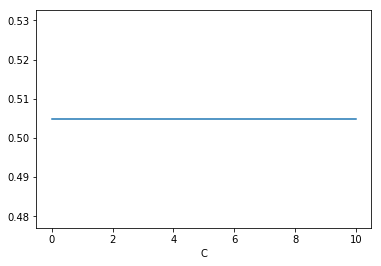

In [32]:
# Take a cross section
res_df.xs(('rbf', 1.0), level=('kernel', 'gamma'))['mean_test_score'].plot()

In [91]:
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
C      gamma kernel                                                 
10.000 0.010 rbf          8.183767      0.309844         2.127672   
0.010  0.100 poly         8.516812      0.465543         2.265979   
10.000 0.010 poly         8.201214      0.317126         2.350388   
1.000  0.100 poly         7.215194      0.182262         2.017246   
0.100  0.100 poly         7.295621      0.054372         1.950261   
10.000 0.100 poly         7.037706      0.233273         2.020711   
       1.000 poly         7.307474      0.334860         1.981371   
1.000  1.000 poly         7.233662      0.129003         1.984483   
0.100  1.000 poly         7.364765      0.282591         1.966776   
0.010  1.000 poly         7.616816      0.242231         1.992836   
0.001  1.000 poly         7.202757      0.067020         1.998768   
1.000  0.010 rbf         11.175852      0.330677         3.090007   
             poly        14.253556      0.221045         4.110308   
0.001  0.100 poly        14.182551      0.306600         4.169084   
10.000 0.100 rbf         63.456145      1.459070        14.405570   
1.000  0.100 rbf         62.647345      1.425690        14.479800   
10.000 0.001 rbf         11.034261      0.246106         2.916358   
0.100  0.010 rbf         24.712510      0.531074         6.939173   
       1.000 linear       8.632174      0.235291         2.044819   
       0.100 linear       8.703342      0.382343         2.170919   
       0.010 linear       8.694071      0.283699         2.023006   
       0.001 linear       8.687066      0.215583         2.061165   
       0.010 poly        31.872870      0.590956         9.210444   
1.000  0.010 linear      10.418321      0.365941         1.604799   
       0.001 linear      10.143736      0.413734         1.635120   
       0.100 linear      10.414583      0.652214         1.623655   
       1.000 linear      10.493299      0.385899         1.628271   
0.010  0.010 linear      12.646722      0.265065         3.354317   
       0.001 linear      12.427445      0.337748         3.295818   
       1.000 linear      12.753978      0.394167         3.309368   
       0.100 linear      12.513770      0.404487         3.289446   
1.000  0.001 rbf         20.766251      0.401519         5.796904   
10.000 0.010 linear      14.493546      0.852985         1.350489   
       0.100 linear      14.663466      1.307381         1.371901   
       1.000 linear      14.538301      0.766837         1.330158   
       0.001 linear      14.543900      0.902419         1.310743   
0.001  0.001 linear      25.540846      0.211506         7.411057   
       0.010 linear      25.529531      0.261127         7.193048   
       0.100 linear      25.709282      0.242115         7.127983   
       1.000 linear      25.779150      0.545223         6.957090   
0.100  0.001 rbf         47.801966      0.868801        13.382056   
0.010  0.010 rbf         60.406254      1.228711        16.785827   
             poly        63.311271      0.896513        17.651916   
10.000 0.001 poly        62.909323      1.221117        17.725749   
0.100  0.100 rbf         63.880163      1.341216        18.378202   
0.010  0.001 rbf         73.328911      0.965855        20.351122   
1.000  0.001 poly        72.078684      1.328906        19.858901   
0.001  0.001 poly        71.733782      0.190497        20.732542   
             rbf         73.124035      0.331112        21.013899   
       0.010 poly        71.043969      0.189880        20.030611   
             rbf         73.718293      0.079404        21.099001   
       1.000 rbf         68.299632      1.447666        22.090634   
0.100  1.000 rbf         71.076994      1.427674        20.774578   
1.000  1.000 rbf         71.649664      1.368875        20.861634   
0.010  0.001 poly        71.725550      1.470305        20.053458   
       0.100 rbf         72.300985      1.178519        20.667441   
       1.000 rbf   

In [77]:
rbf = res_df.xs('rbf', level='kernel')
rbf = rbf.reset_index()
lin = res_df.xs('linear', level='kernel')
lin = lin.reset_index()
poly = res_df.xs('poly', level='kernel')
poly = poly.reset_index()

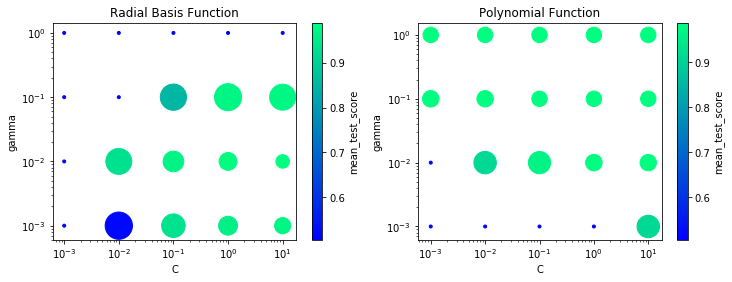

In [106]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.set_title('Radial Basis Function')
rbf.plot(kind='scatter', x='C', y='gamma', c='mean_test_score', s=rbf['std_test_score']*100000, cmap='winter', logx=True, logy=True, ax=ax1)

ax2.set_title('Polynomial Function')
poly.plot(kind='scatter', x='C', y='gamma', c='mean_test_score', s=poly['std_test_score']*100000, cmap='winter', logx=True, logy=True, ax=ax2)


# Gamma has no effect for linear kernel
# ax3.set_title('Linear Function')
# lin.plot(kind='scatter', x='C', y='gamma', c='mean_test_score', s=lin['std_test_score']*100000, cmap='winter', logx=True, logy=True, ax=ax3)

In [113]:
# Helper function needed for std==0.0
def std_to_size(std):
    if std > 0:
        return std * 100
    else:
        return 10

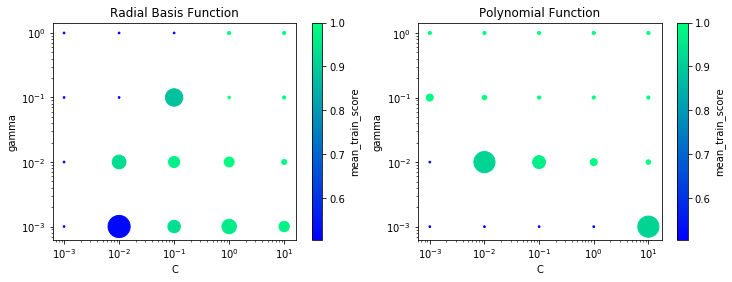

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.set_title('Radial Basis Function')
rbf.plot(kind='scatter', x='C', y='gamma', c='mean_train_score', s=rbf['std_train_score'].apply(std_to_size), cmap='winter', logx=True, logy=True, ax=ax1)

ax2.set_title('Polynomial Function')
poly.plot(kind='scatter', x='C', y='gamma', c='mean_train_score', s=poly['std_train_score'].apply(std_to_size), cmap='winter', logx=True, logy=True, ax=ax2)

# ax3.set_title('Linear Function')
# lin.plot(kind='scatter', x='C', y='gamma', c='mean_train_score', s=lin['std_train_score'].apply(std_to_size), cmap='winter', logx=True, logy=True, ax=ax3)

## SVM Learning Curve Analysis

In [110]:
# Find best estimator
best_params = res['params'][np.argmin(res['rank_test_score'])]
clf = SVC(**best_params)
clf.get_params()

{'C': 10,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

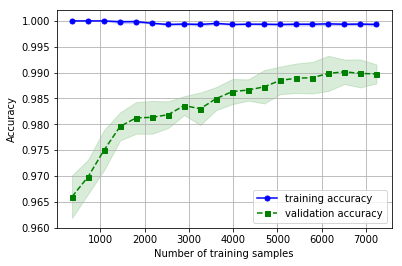

In [111]:
train_sizes, _, _, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train_scaled, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20))

### Timing statistics

In [ ]:
scipy.stats.describe(res['mean_fit_time'])

In [ ]:
scipy.stats.describe(res['mean_score_time'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

train_colors = ['blue', 'darkgreen', 'purple', 'navy', 'maroon']
test_colors = ['green', 'gold', 'coral', 'teal', 'magenta']

for ix, d in enumerate(param_grid['base_estimator__max_depth']):
    ax.plot(param_grid['n_estimators'], mean_fit[d],  label='max_depth %i' % d,
            marker='o', color=train_colors[ix], linestyle='-',
            markersize=5)
    ax.fill_between(param_grid['n_estimators'],
                  mean_fit[d] + std_fit[d],
                  mean_fit[d] - std_fit[d],
                  alpha=0.15, color=train_colors[ix])
plt.grid()
plt.legend(loc='lower right')
ax.set_ylabel('Fit time (sec)')
plt.xlabel('Number of weak learners')
plt.show()

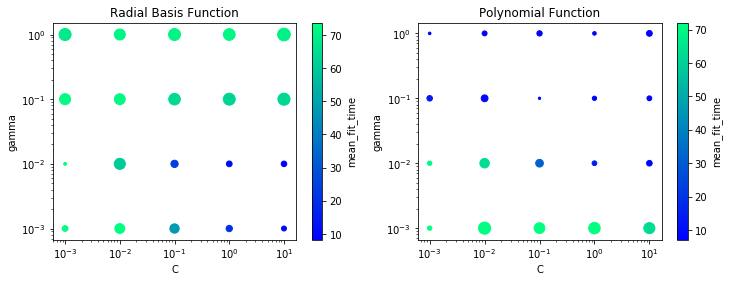

In [114]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.set_title('Radial Basis Function')
rbf.plot(kind='scatter', x='C', y='gamma', c='mean_fit_time', s=rbf['std_fit_time'].apply(std_to_size), cmap='winter', logx=True, logy=True, ax=ax1)

ax2.set_title('Polynomial Function')
poly.plot(kind='scatter', x='C', y='gamma', c='mean_fit_time', s=poly['std_fit_time'].apply(std_to_size), cmap='winter', logx=True, logy=True, ax=ax2)